# Assignments

# Assignment 1

Due: Sunday, September 22, 2019

- - -

### A. **Exercise 2.1** A simple example
Consider the first-order differential equation
$$\frac{\mathrm{d}y}{\mathrm{d}x} = f(x)$$

where $f(x)$ is a function of $x$. The approximate solution as given by the Euler algorithm is

$$ y_{n+1} = y_n + f(x_n) \Delta x.$$
Note that the rate of change of $y$ has been approximated by its value the *beginning of the interval*, $f(x_n)$

a. Suppose that $f(x) = 2x$ and $y(x=0) = 0$. The analytical solution is $y(x) = x^2$, which we can confirm by taking the derivative of $y(x)$.
Convert the first-order differential equation into a finite difference equatino using the Euler algorithm. For simplicity, choose $\Delta x = 0.1$. It may be a good idea to first use a calculator or pencil and paper to determine $y_n$ for the first several time steps.

b. Plot the difference between the exact solution and the approximate solution given by the Euler algorithm. What condition would the rate of change, $f(x)$, have to satisfy for the Euler algorithm to give the exact answer?

- - -

- - -
### C. **Exercise** Model a falling ball

a. Write a new program called `FallingBallApp` that models and then plots the vertical position verus time for a falling ball under gravity that stops when it hits the ground.  You will need to create a new function `FallingBallStepper` that yields the output at every time step. Your program should call a new function `FallingBallPlot` that plots both the numerical results **and** the analytical solution for all time steps. Be sure to include a legend and label your axes. Run your program in a Jupyter notebook to show your plot.

b. Modify your `FallingBallApp` program so that it take a single argument `dt` to set the time step.  Make your program interactive (`from ipywidgets import interactive`) to explore how the numerical solution differs from the analytical solution. How much smaller does $\Delta t$ have to be to reduce the error in the numerical results by a factor of two for the same final time? What about a factor of four? How does the error depend on $\Delta t$?
- - -

# Assignment 2

Due: Sunday, September 29, 2019

- - -

### A. **Problem 3.7** Position-dependent force

Extend `FallingParticleStepper()` and `FallingParticleApp()` to simulate the fall of a particle with the position-dependent force law $F = mg\left(1-2\frac{y}{R}\right)$. Assume that a particle is dropped from a height $h$ with zero initial velocity and compute its impact velocity (speed) when it hits the ground at $y= 0$. Determine the value of $h$ for which the impact velocity differs by one percent from its value with a constant acceleration $g=9.8\; \mathrm{m/s}^2$. Take $R= 6.37\times10^6\;\mathrm{m}$. Make sure that the one percent difference is due to the physics of the force law and not the accuracy of your algorithm (this can be confirmed by showing that the result changes by signifcantly less than one percent if you half the size of your time step).

- - - 

- - -

### B. **Problem 3.9** Effect of air resistance on the ascent and descent of a pebble

a. Compute the speed at which a pebble reaches the ground if it is dropped from rest at a height of $50\;\mbox{m}$. Compare this speed to that of a freely falling object under the same conditions. Assume that the drag force is proportional to $v^2$ and that the terminal velocity is 30 m/s.

b. Suppose a pebble is thrown vertically upward with an initial velocity $v_0$. In the absence of air resistance, we know that the maximum height reached by the pebble is $ v_0^2/2g$, its velocity upon return to the Earth equals $v_0$, the time of ascent equals the time of descent, and the total time in the air is $2 v_0/g$. Before doing a simulation, give a simple qualitative explanation of how you think these quantities will be affected by air resistance. In particular, how will the time of ascent compare with the time of descent?

c. Do a simulation to determine if your qualitative answers in part (b) are correct. Assume that the drag force is proportional to $v^2$. Choose the coordinate system with $y$ positive upward. What is the net force for $v >0$ and $v <0$? We can characterize the magnitude of the drag force by a terminal velocity even if the motion of the pebble is upward and even if the pebble never attains this velocity. Choose the terminal velocity $v_t= 30\;\mbox{m/s}$, corresponding to a drag coefficient of $C_2 \approx 0.000109$. It is a good idea to choose an initial velocity that allows the pebble to remain in the air for a time sufficiently long so that the effect of the drag force isappreciable. A reasonable choice is $v(t= 0) = 50 \mbox{m/s}$. You might find it convenient to express the drag force in the form $F_d\propto - \mathrm{v * abs(v)}$. 

- - -

# Assignment 3

Due: Sunday, October 6, 2019

- - -

### A. **Problem 3.10** Trajectory of a steel ball

. . . skip

- - -
### B. **Problem** Model a ping-pong ball

. . . skip

# Assignment 4

Due: Sunday, October 27, 2019

- - -

### A. Simpson's Rule for Integration

In Lecture 11 we compared the Rectangular Rule to the Trapezoid Rule for evaluating the integral

$$\int_a^b f(x) dx $$

where

$$ f(x)= \sin(x) + x^3, \quad a=0, \quad  b =5 $$

In [8]:
a = 0
b = 5
def f(x):
    return np.sin(x) + x**3

We know that we can evaluate this integral exactly as

$$\int_0^5 \sin(x) + x^3 dx = \left(-\cos(x) + \frac{1}{4}x^4 \right)_0^5$$

That is, we can caculate the exact result as

In [7]:
exact = (-np.cos(5) + 1/4 * 5**4) - (-np.cos(0) + 1/4 * 0**4)
print(exact)

156.9663378145368


Numerically, we can integrate the function $f(x)$ using either the Rectangular Rule:

In [20]:
def compute_rect(n):
    dx = (b-a)/n

    sum = 0
    for i in range(n):
        x_i = a + i*dx
        f_i = f(x_i)
        sum += f_i * dx
        
    return sum

or the Trapezoid Rule:

In [10]:
def compute_trap(n):
    dx = (b-a)/n

    x_0 = a + 0*dx # a
    x_n = a + n*dx # b
    sum = f(x_0)/2 + f(x_n)/2

    for i in range(1, n):
        x_i = a + i*dx
        f_i = f(x_i)
        sum += f_i

    sum = sum * dx
    
    return sum

We investigate the performance of these two different methods for numerical integration by calculating the relative numerical error as a function of the number of intervals, $n$, used.

In [21]:
num_elements = 2**np.arange(1, 11)

def calc_error(compute_method):
    Δ = []
    for n in num_elements:
        integrand = compute_method(n)
        rel_error = abs(integrand - exact)/exact
        Δ.append(rel_error)
    return Δ

Δrect = calc_error(compute_rect)
Δtrap = calc_error(compute_trap)

Note that `calc_error()` takes the name of another function as its argument.

We can then plot the relative numerical error versus the number of elements used in the integration.

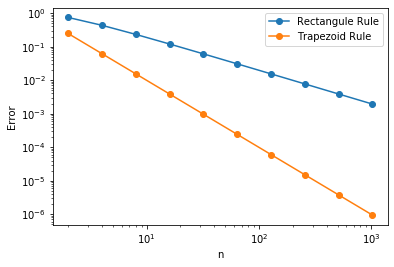

In [22]:
plt.loglog(num_elements, Δrect, 'o-', label='Rectangule Rule')
plt.loglog(num_elements, Δtrap, 'o-', label='Trapezoid Rule')
plt.xlabel('n')
plt.ylabel('Error')
plt.legend()
plt.show()

1. Define a new function called `compute_simpson()` that performs a numerical integration of $f(x)$ using Simpson's Rule.

2. Compute the relative numerical error versus the number of elements used in the integration when applying Simpson's Rule.

3. Make a plot of this relative numerical error for Simpson's Rule compared to the number of elements.

4. We say that the Rectangular Rule is an $\mathcal{O}(1/n)$ method because the error decreases proportional to $n^{-1}$ (notice the slop of the log-log plot is -1).  Similarily, we say that the Trapezoid Rule is an $\mathcal{O}(1/n^2)$ method because the error decreases proportional to $n^{-2}$ (notice the slop of the log-log plot is -2). What is the order of Simpson's Rule and why?



- - -
### B. Second-Order ODE Methods



### a)
Solve the following ODE using the **midpoint scheme** from $t$=0 to 3, using a step size of $\Delta t$ = 0.1.  Make a plot of your numerical solution.

$$y'(t)=-y^2+\cos(y t),\quad y(0)=1$$

### b)
Repeat part (a), except implement a **predictor-corrector** algorithm given below (this is new algorithm that was not covered in lecture).  Compare your result to what was found in part (a).

To solve the ODE $y'(t) = f(y, t)$

$$ y^* = y_n + \Delta t f(y_n, t) $$
$$ y_{n+1} = y_n + \frac{1}{2} \Delta t [ f(y^*, t_{n+1}) + f( y_n, t_n) ] $$

# Assignment 5

Due: Sunday, November 3, 2019

## A. Coupled ODEs with RK4

### a) 
Use a fourth-order Runge-Kutta scheme to solve the following set of coupled ODE's:

$$ \frac{dy}{dt} + 3x = \cos(t) + 5$$
$$ \frac{dx}{dt} - 3y = \sin(2t)$$

with

$$ y(0) = 3, x(0) = 1 $$

from t = 0 to t = 10 using a timestep of 0.1. Plot your solutions for x(t) and y(t).

### b)
The exact solution to this first-order system of linear differential equations is given by

\begin{align}
x(t) &= 3 \sin(3 t)+3/8 \cos(t)+2/5 \cos(2 t)-173/120 \cos(3 t)+5/3 \\
y(t) &= -1/8\sin(t)-3/5 \sin(2 t)+173/120 \sin(3 t)+3 \cos(3 t)
\end{align}

Define a Python function for each of these exact solutions.

## c) 
Plot the difference between your numerical solution and the exact solution for y(t)

### d)
Repeat the necessary steps from part a) in order to plot the difference between your numerical solution and the exact solution for y(t) when the timestep is decreased by a factor of 10 to $\Delta t=0.01$.  Comment on the outcome.

# Assignment 6

Due: Sunday, November 10, 2019

In this assignment, Problem A has been done for you. Run each cell as given. Read and try to understand how the solution is constructed. 

Then, for Problems B and C try and solve more complicated versions of the same problem. It may be helpful to copy-and-paste the complete solution for Problem A and then edit it to be the solution to Problems B and C.  The lines of code in Problem A that will need to modified are marked with the symbols `# <==` to try and help you. Also remember to edit the Markdown text within the question so that it is consistent with the question being answered.

- - -

### A. Atwood's machine

Atwood's machine consists of two masses ($m_1$ and $m_2$) hanging by a non-elastic rope of negligible mass running over a small, massless and frictionless pulley.  The rope is a length $L$ long and the pulley is a height $H$ off the ground. 

Find the position of the masses a function of time in terms of relavent parameters of the system assuming the heavier mass, $m_1$, starts from rest at a height of $y_0$ above the ground.

Let $m_1 = 5.1\;\mbox{kg}, m_2 = 5.0\;\mbox{kg}, g=9.8\;\mbox{m/s}^2, H=1.0\;\mbox{m}, L= 0.8\;\mbox{m},$ and $y_{0}=0.9\;\mbox{m}$.


***Solution***

We start by declaring the symbols we will need in this problem:

In [ ]:
m1, m2, t, H, L, g, T = sp.symbols('m1, m2, t, H, L, g, T')     # <==
y1, y2 = sp.symbols('y1, y2', cls=sp.Function)                  # <==

Because of the geometrical setup of the system, the accelerations of the masses are equal in magnitude and opposite in direction.  But, another way of describing this geomtrical requirement is to write a *constraint equation* that must always equal to zero.

In [ ]:
constraint = y1(t) + y2(t) + L - 2*H                            # <==
constraint

Notice that if you take the second derivative with $t$ for this equation, you recover the same idea that says $a_1 = -a_2$. 

In [ ]:
constraint.diff(t, t)

Here is Newton's Law applied to mass 1,

In [ ]:
eq1 = m1 * y1(t).diff(t, t) + m1 * g - T                        # <==
eq1

and also applied to mass 2

In [ ]:
eq2 = m2 * y2(t).diff(t, t) +  m2 * g - T                       # <==
eq2

Using the constraint, we can solve for $y_2(t)$ as the expression `y2_`

In [ ]:
y2_ = sp.solve(constraint, y2(t))[0]
y2_

This allow us to replace $y_2(t)$ in equation (2) with this expression to get the new equation

In [ ]:
eq3 = eq2.subs({y2(t): y2_}).doit()
eq3

Likewise, we can solve equation (3) for $T$ as the expression `T_`

In [ ]:
T_ = sp.solve(eq3, T)[0]
T_

Substituting back into equation (1) gives

In [ ]:
eq4 = eq1.subs({T: T_}).doit()
eq4

Equation (4) is a differential equation that could be solved with `sp.dsolve()`.  Instead, we are going to solve for the acceleration of mass 1 so that we can solve the problem numerically.

In [ ]:
a1 = sp.solve(eq4, y1(t).diff(t, t))[0]
a1

Here are the numerical parameters for this problem.

In [ ]:
params = {m1:5.1, m2:5.0, g:9.8, H:1.0, L:0.8 }                   # <==

We can define a NumPy function that evaluates the second derivative in terms of $t$, $y_1(t)$, and $\frac{d y_1}{dt}$. 

(*For this particular problem the accleration is constant, but in general could depend on $t$, $y_1$, and $v_1 = \frac{d y_1}{dt}$*)

In [ ]:
dvdt = sp.lambdify( (t, y1(t), y1(t).diff(t)), a1.subs(params) )

We can solve the problem numerically using the SciPy solver `odeint`.

In [ ]:
from scipy.integrate import odeint

def RHS(s, t):
    y, v = s
    return [v, dvdt(t, y, v)]

t_ = np.arange(0, 1, 0.01)

y0 = 0.9
v0 = 0
s0 = [y0, v0]

soln = odeint(RHS, s0, t_)

data = pd.DataFrame(soln, columns=['y1', 'v'])
data['t'] = t_

We can also evaluate the function $y_2(t)$

In [ ]:
y2_                                                              # <==

by evaluating the above expression as a function of $y_1$

In [ ]:
y2 = sp.lambdify(y1(t), y2_.subs(params))                        # <==
data['y2'] = y2(data.y1)                                         # <==

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs[0].plot(data.t, data.y1)
axs[0].set_ylabel('$y_1(t)$')
axs[0].set_xlabel('$t$')

axs[1].plot(data.t, data.y2)                                     # <==
axs[1].set_ylabel('$y_2(t)$')                                    # <==
axs[1].set_xlabel('$t$')

plt.show()

The above plot shows that heavier mass falls down while the lighter mass rises up.

- - -
## B. Atwood's machine over a table

An Atwood's machine is constructed with two masses ($m_1$ and $m_2$) attached with a rope of negligible mass running over a small, massless and frictionless pulley.  The rope is a length $L$ long and the pulley is a height $H$ off the ground. 

In this problem, the heavier mass, $m_2$, lies on a frictionless table of height $H$ and is connected by a rope running parallel to the table through a pulley to the lighter mass, $m_1$, which is hanging vertically.  Use the symbols $y_1(t)$ and $x_2(t)$ to make it clearer that the lighter mass, $m_1$ moves vertically and the heavier mass, $m_2$ moves horizontally.  Consider a coordinate system where the ground is at $y=0$, the pulley is $x=0$, and the mass on the table starts off to the right with $x_2 > 0$.

Find the position of the masses a function of time in terms of relavent parameters of the system assuming the lighter mass, $m_1$, starts from rest at a height of $y_0$ above the ground. (**Note**: *$m_1$ is now the lighter of the two masses*)

Let $m_1 = 1.0\;\mbox{kg}, m_2 = 5.0\;\mbox{kg}, g=9.8\;\mbox{m/s}^2, H=1.0\;\mbox{m}, L= 0.8\;\mbox{m},$ and $y_{0}=0.9\;\mbox{m}$.


***Solution***

- - -
## C. Atwood's machine over a table with an angle

An Atwood's machine is constructed with two masses ($m_1$ and $m_2$) attached with a rope of negligible mass running over a small, massless and frictionless pulley.  The rope is a length $L$ long and the pulley is a height $H$ off the ground. 

In this problem, the heavier mass, $m_2$, lies on a frictionless table of height $h$ (where $h < H$) and is connected by a rope running through a pulley to the lighter mass, $m_1$, which is hanging vertically.  The difference here is that the angle that the rope makes to the table is now changing with time and so the tension on the rope is no longer a constant.  You may assume that the heavier mass always remains on the table. Importantly, it is no longer true that the magnitude of the accleration of these two masses are still the same. Again, use the symbols $y_1(t)$ and $x_2(t)$ to make it clearer that the lighter mass, $m_1$ moves vertically and the heavier mass, $m_2$ moves horizontally.

Find the position of the masses a function of time in terms of relavent parameters of the system assuming the heavier mass, $m_1$, starts from rest at a height of $y_0$ above the ground.

Let $m_1 = 1.0\;\mbox{kg}, m_2 = 5.0\;\mbox{kg}, g=9.8\;\mbox{m/s}^2, H=1.0\;\mbox{m}, L= 0.8\;\mbox{m}, y_{0}=0.9\;\mbox{m},$ and $h=0.5\;\mbox{m}$.


***Solution***

# Assignment 7

Due: Friday, November 29, 2019  12:00 noon.

- - -

### A. Three particles under Lennard-Jones Potential

Consider particles each interacting with the pair potential 

$$U(r) = 4 \left(\left(\frac{1}{r^{12}}\right)-\left(\frac{1}{r^4}\right)\right)$$

where r is the distance between the particles. At time $t = 0$, there are three masses $m_1 = 1$, $m_2 = 20$, and $m_3 = 2$ that have initial positions $r_1 = (-3,1)$, $r_2 = (0,0)$ and $r_3 = (3,-2)$, and velocities $v_1 = (2,0)$, $v_2 = (0,0)$ and $v_3 = (-2,2)$. Plot the trajectory of the particles on one graph up to $t_f = 10$.

In the problem, all motion is confined to the x-y plane.

Solve this problem numerically with a Midpoint Method stepper numerical method.